# Predicting-market-volatility-and-building-short-term-trading-strategies-using-data-from-Reddit

### Merging csv files

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics

In [2]:
data1 = pd.read_csv('Stock_data.csv')
data1

,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,3272,2012-01-03,1258.86,1284.62,1258.86,1277.06,678971776
1,3273,2012-01-04,1277.03,1278.73,1268.10,1277.30,640869376
2,3274,2012-01-05,1277.30,1283.05,1265.26,1281.06,676180992
3,3275,2012-01-06,1280.93,1281.84,1273.34,1277.81,596105216
4,3276,2012-01-09,1277.83,1281.99,1274.55,1280.70,592425728
...,...,...,...,...,...,...,...
1827,5099,2019-04-09,2886.58,2886.88,2873.33,2878.20,448236928
1828,5100,2019-04-10,2881.37,2889.71,2879.13,2888.21,401127840
1829,5101,2019-04-11,2891.92,2893.42,2881.99,2888.32,415962880
1830,5102,2019-04-12,2900.86,2910.54,2898.37,2907.41,505162656


In [3]:
data1['Date']=pd.to_datetime(data1.Date)

In [4]:
data2 = pd.read_csv('clean_data.csv')
data2

,Unnamed: 0,body,score,date,negative_score,neutral_score,postive_score,compound_score,final_tag
0,0,lol yeah welp,1,2014-10-09,0.000,0.167,0.833,0.6124,Positive
1,1,crypto miners is not a significant enough mark...,1,2014-02-19,0.027,0.739,0.234,0.9680,Positive
2,2,sold a covered call at 560 i almost wish it dr...,1,2014-04-24,0.000,0.816,0.184,0.6509,Positive
3,3,nflx because earning reports releases 10 12 fo...,1,2014-01-20,0.000,1.000,0.000,0.0000,Neutral
4,4,agreed 100 when are their earnings i would lik...,1,2014-07-25,0.000,0.621,0.379,0.6908,Positive
...,...,...,...,...,...,...,...,...,...
2815013,2815058,all i got to say is calm yo tits,3,2017-01-25,0.186,0.588,0.225,0.1027,Positive
2815014,2815059,true tho in t it,1,2017-01-29,0.000,0.517,0.483,0.4215,Positive
2815015,2815060,gold is a key element in electronics the bot h...,1,2017-01-11,0.244,0.756,0.000,-0.4404,Negative
2815016,2815061,listen up kids as i tell you how i earned my f...,9,2017-01-10,0.102,0.808,0.090,-0.6495,Negative


In [5]:
data2 = data2.rename(columns={'body':'Body','score':'Score','date':'Date','negative_score':'Negative_score',
                             'postive_score':'Postive_score','neutral_score':'Neutral_score','compound_score':'Compound_score',
                             'final_tag':'Final_tag'})

In [6]:
data2

,Unnamed: 0,Body,Score,Date,Negative_score,Neutral_score,Postive_score,Compound_score,Final_tag
0,0,lol yeah welp,1,2014-10-09,0.000,0.167,0.833,0.6124,Positive
1,1,crypto miners is not a significant enough mark...,1,2014-02-19,0.027,0.739,0.234,0.9680,Positive
2,2,sold a covered call at 560 i almost wish it dr...,1,2014-04-24,0.000,0.816,0.184,0.6509,Positive
3,3,nflx because earning reports releases 10 12 fo...,1,2014-01-20,0.000,1.000,0.000,0.0000,Neutral
4,4,agreed 100 when are their earnings i would lik...,1,2014-07-25,0.000,0.621,0.379,0.6908,Positive
...,...,...,...,...,...,...,...,...,...
2815013,2815058,all i got to say is calm yo tits,3,2017-01-25,0.186,0.588,0.225,0.1027,Positive
2815014,2815059,true tho in t it,1,2017-01-29,0.000,0.517,0.483,0.4215,Positive
2815015,2815060,gold is a key element in electronics the bot h...,1,2017-01-11,0.244,0.756,0.000,-0.4404,Negative
2815016,2815061,listen up kids as i tell you how i earned my f...,9,2017-01-10,0.102,0.808,0.090,-0.6495,Negative


In [7]:
data2 = data2.drop(['Body','Score'],axis=1)
data2

,Unnamed: 0,Date,Negative_score,Neutral_score,Postive_score,Compound_score,Final_tag
0,0,2014-10-09,0.000,0.167,0.833,0.6124,Positive
1,1,2014-02-19,0.027,0.739,0.234,0.9680,Positive
2,2,2014-04-24,0.000,0.816,0.184,0.6509,Positive
3,3,2014-01-20,0.000,1.000,0.000,0.0000,Neutral
4,4,2014-07-25,0.000,0.621,0.379,0.6908,Positive
...,...,...,...,...,...,...,...
2815013,2815058,2017-01-25,0.186,0.588,0.225,0.1027,Positive
2815014,2815059,2017-01-29,0.000,0.517,0.483,0.4215,Positive
2815015,2815060,2017-01-11,0.244,0.756,0.000,-0.4404,Negative
2815016,2815061,2017-01-10,0.102,0.808,0.090,-0.6495,Negative


In [8]:
date_unique = pd.unique(data2['Date'])
date_unique

array(['2014-10-09', '2014-02-19', '2014-04-24', ..., '2017-01-08',
       '2017-01-22', '2017-01-09'], dtype=object)

In [9]:
data2 = data2.groupby(['Date']).mean().reset_index()
data2

,Date,Unnamed: 0,Negative_score,Neutral_score,Postive_score,Compound_score
0,2012-04-11,5.226470e+05,0.030500,0.869786,0.099714,0.135264
1,2012-04-12,6.461633e+05,0.000000,0.895000,0.105000,0.299767
2,2012-04-13,4.986680e+05,0.125500,0.874500,0.000000,-0.345400
3,2012-04-14,4.782340e+05,0.000000,0.706000,0.294000,0.361200
4,2012-04-16,4.643050e+05,0.000000,0.833500,0.166500,0.719450
...,...,...,...,...,...,...
2339,2018-10-27,1.743732e+06,0.090565,0.775142,0.121940,0.062562
2340,2018-10-28,1.750558e+06,0.086619,0.786959,0.119887,0.054758
2341,2018-10-29,1.746264e+06,0.088850,0.787243,0.118101,0.034640
2342,2018-10-30,1.745457e+06,0.096882,0.779505,0.115886,0.014097


In [10]:
def analysis(score):
    if score<0:
        return 'Negative'
    elif score>0:
        return 'Positive'
    else:
        return 'Neutral'
    
data2['Final_tag'] = data2.apply(lambda x: analysis(x['Compound_score']),axis =1)
data2['Final_tag']

0       Positive
1       Positive
2       Negative
3       Positive
4       Positive
          ...   
2339    Positive
2340    Positive
2341    Positive
2342    Positive
2343    Positive
Name: Final_tag, Length: 2344, dtype: object

In [11]:
data2.Final_tag.value_counts()

Positive    2238
Negative      86
Neutral       20
Name: Final_tag, dtype: int64

In [12]:
data2['Date']=pd.to_datetime(data2.Date)
data2['date_year'] = data2['Date'].dt.year
data2['date_month'] = data2['Date'].dt.month
data2['date_day'] = data2['Date'].dt.day

In [13]:
data2

,Date,Unnamed: 0,Negative_score,Neutral_score,Postive_score,Compound_score,Final_tag,date_year,date_month,date_day
0,2012-04-11,5.226470e+05,0.030500,0.869786,0.099714,0.135264,Positive,2012,4,11
1,2012-04-12,6.461633e+05,0.000000,0.895000,0.105000,0.299767,Positive,2012,4,12
2,2012-04-13,4.986680e+05,0.125500,0.874500,0.000000,-0.345400,Negative,2012,4,13
3,2012-04-14,4.782340e+05,0.000000,0.706000,0.294000,0.361200,Positive,2012,4,14
4,2012-04-16,4.643050e+05,0.000000,0.833500,0.166500,0.719450,Positive,2012,4,16
...,...,...,...,...,...,...,...,...,...,...
2339,2018-10-27,1.743732e+06,0.090565,0.775142,0.121940,0.062562,Positive,2018,10,27
2340,2018-10-28,1.750558e+06,0.086619,0.786959,0.119887,0.054758,Positive,2018,10,28
2341,2018-10-29,1.746264e+06,0.088850,0.787243,0.118101,0.034640,Positive,2018,10,29
2342,2018-10-30,1.745457e+06,0.096882,0.779505,0.115886,0.014097,Positive,2018,10,30


In [14]:
#Here have mergerd to dataset which we read in data1 and data2
dataset = pd.merge(data1,data2,on='Date',how='inner')
dataset

,Unnamed: 0_x,Date,Open,High,Low,Close,Volume,Unnamed: 0_y,Negative_score,Neutral_score,Postive_score,Compound_score,Final_tag,date_year,date_month,date_day
0,3340,2012-04-11,1358.98,1374.71,1358.98,1368.70,593003200,5.226470e+05,0.030500,0.869786,0.099714,0.135264,Positive,2012,4,11
1,3341,2012-04-12,1368.77,1388.13,1368.77,1387.56,547368832,6.461633e+05,0.000000,0.895000,0.105000,0.299767,Positive,2012,4,12
2,3342,2012-04-13,1387.61,1387.61,1369.85,1370.26,631237824,4.986680e+05,0.125500,0.874500,0.000000,-0.345400,Negative,2012,4,13
3,3343,2012-04-16,1370.27,1379.66,1365.38,1369.57,596952128,4.643050e+05,0.000000,0.833500,0.166500,0.719450,Positive,2012,4,16
4,3344,2012-04-17,1369.57,1392.76,1369.57,1390.78,566529216,5.008821e+05,0.069412,0.766824,0.163706,0.172247,Positive,2012,4,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1632,4987,2018-10-25,2674.88,2722.70,2667.84,2705.57,767958464,1.745971e+06,0.095529,0.770501,0.123609,0.030654,Positive,2018,10,25
1633,4988,2018-10-26,2667.86,2692.38,2628.16,2658.69,870121024,1.746177e+06,0.093387,0.772730,0.121332,0.027263,Positive,2018,10,26
1634,4989,2018-10-29,2682.65,2706.85,2603.54,2641.25,778263680,1.746264e+06,0.088850,0.787243,0.118101,0.034640,Positive,2018,10,29
1635,4990,2018-10-30,2640.68,2685.43,2635.34,2682.63,888192192,1.745457e+06,0.096882,0.779505,0.115886,0.014097,Positive,2018,10,30


In [15]:
dataset.dtypes

Unnamed: 0_x               int64
Date              datetime64[ns]
Open                     float64
High                     float64
Low                      float64
Close                    float64
Volume                     int64
Unnamed: 0_y             float64
Negative_score           float64
Neutral_score            float64
Postive_score            float64
Compound_score           float64
Final_tag                 object
date_year                  int64
date_month                 int64
date_day                   int64
dtype: object

In [16]:
# Here we have dropped the unneccesary columns
dataset = dataset.drop(['Unnamed: 0_x','Unnamed: 0_y'],axis=1)

date_list = dataset['Date']
tags = dataset.Final_tag
tag_list = []
for d in date_list:
    for tag in tags:
        if tag=='Negative':
            tag_list.append(-1)
        elif tag=='Positive':
            tag_list.append(1)
        else:
            tag_list.append(0)
    #dataset.Final_tag = statistics.mode(tag_list)
    dataset.Final_tag[d] = statistics.mode(tag_list)
    tag_list.clear()

In [17]:
# For prediction we need dependent variable so we have created the dependent variable with name Target_Variable
dataset['Target_Variable']=np.nan
dataset

,Date,Open,High,Low,Close,Volume,Negative_score,Neutral_score,Postive_score,Compound_score,Final_tag,date_year,date_month,date_day,Target_Variable
0,2012-04-11,1358.98,1374.71,1358.98,1368.70,593003200,0.030500,0.869786,0.099714,0.135264,Positive,2012,4,11,NaN
1,2012-04-12,1368.77,1388.13,1368.77,1387.56,547368832,0.000000,0.895000,0.105000,0.299767,Positive,2012,4,12,NaN
2,2012-04-13,1387.61,1387.61,1369.85,1370.26,631237824,0.125500,0.874500,0.000000,-0.345400,Negative,2012,4,13,NaN
3,2012-04-16,1370.27,1379.66,1365.38,1369.57,596952128,0.000000,0.833500,0.166500,0.719450,Positive,2012,4,16,NaN
4,2012-04-17,1369.57,1392.76,1369.57,1390.78,566529216,0.069412,0.766824,0.163706,0.172247,Positive,2012,4,17,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1632,2018-10-25,2674.88,2722.70,2667.84,2705.57,767958464,0.095529,0.770501,0.123609,0.030654,Positive,2018,10,25,NaN
1633,2018-10-26,2667.86,2692.38,2628.16,2658.69,870121024,0.093387,0.772730,0.121332,0.027263,Positive,2018,10,26,NaN
1634,2018-10-29,2682.65,2706.85,2603.54,2641.25,778263680,0.088850,0.787243,0.118101,0.034640,Positive,2018,10,29,NaN
1635,2018-10-30,2640.68,2685.43,2635.34,2682.63,888192192,0.096882,0.779505,0.115886,0.014097,Positive,2018,10,30,NaN


In [18]:
dataset.reset_index(inplace=True)

In [19]:
dataset['Final_tag'].value_counts()

Positive    1580
Negative      46
Neutral       11
Name: Final_tag, dtype: int64

In [20]:
dataset['Target_Variable'] = dataset['Close'].diff().fillna(0)
dataset['Target_Variable']

0        0.00
1       18.86
2      -17.30
3       -0.69
4       21.21
        ...  
1632    49.47
1633   -46.88
1634   -17.44
1635    41.38
1636    29.11
Name: Target_Variable, Length: 1637, dtype: float64

In [21]:
dataset

,index,Date,Open,High,Low,Close,Volume,Negative_score,Neutral_score,Postive_score,Compound_score,Final_tag,date_year,date_month,date_day,Target_Variable
0,0,2012-04-11,1358.98,1374.71,1358.98,1368.70,593003200,0.030500,0.869786,0.099714,0.135264,Positive,2012,4,11,0.00
1,1,2012-04-12,1368.77,1388.13,1368.77,1387.56,547368832,0.000000,0.895000,0.105000,0.299767,Positive,2012,4,12,18.86
2,2,2012-04-13,1387.61,1387.61,1369.85,1370.26,631237824,0.125500,0.874500,0.000000,-0.345400,Negative,2012,4,13,-17.30
3,3,2012-04-16,1370.27,1379.66,1365.38,1369.57,596952128,0.000000,0.833500,0.166500,0.719450,Positive,2012,4,16,-0.69
4,4,2012-04-17,1369.57,1392.76,1369.57,1390.78,566529216,0.069412,0.766824,0.163706,0.172247,Positive,2012,4,17,21.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1632,1632,2018-10-25,2674.88,2722.70,2667.84,2705.57,767958464,0.095529,0.770501,0.123609,0.030654,Positive,2018,10,25,49.47
1633,1633,2018-10-26,2667.86,2692.38,2628.16,2658.69,870121024,0.093387,0.772730,0.121332,0.027263,Positive,2018,10,26,-46.88
1634,1634,2018-10-29,2682.65,2706.85,2603.54,2641.25,778263680,0.088850,0.787243,0.118101,0.034640,Positive,2018,10,29,-17.44
1635,1635,2018-10-30,2640.68,2685.43,2635.34,2682.63,888192192,0.096882,0.779505,0.115886,0.014097,Positive,2018,10,30,41.38


In [22]:
# Here we are calculating values for target variable
# Value is 1 if 'Today's closing price is greater than yesterday's closing price'
# Value is 0 if 'Today's closing price is lesser than yesterday's closing price'
'''i=0
while(i<1636):
    if dataset.Close[i]<=dataset.Close[i+1]:
        dataset.Target_Variable[i]=1
    else:
        dataset.Target_Variable[i]=0
    i=i+1

dataset.head(10)
'''

def get_target_variable(value):
    if value > 0:
        return 1
    else:
        return 0
    
    
dataset['Target_Variable'] = dataset.apply(lambda x: get_target_variable(x['Target_Variable']),axis =1)
dataset['Target_Variable']

0       0
1       1
2       0
3       0
4       1
       ..
1632    1
1633    0
1634    0
1635    1
1636    1
Name: Target_Variable, Length: 1637, dtype: int64

In [23]:
dataset = dataset.drop(['index'],axis=1)

In [24]:
dataset

,Date,Open,High,Low,Close,Volume,Negative_score,Neutral_score,Postive_score,Compound_score,Final_tag,date_year,date_month,date_day,Target_Variable
0,2012-04-11,1358.98,1374.71,1358.98,1368.70,593003200,0.030500,0.869786,0.099714,0.135264,Positive,2012,4,11,0
1,2012-04-12,1368.77,1388.13,1368.77,1387.56,547368832,0.000000,0.895000,0.105000,0.299767,Positive,2012,4,12,1
2,2012-04-13,1387.61,1387.61,1369.85,1370.26,631237824,0.125500,0.874500,0.000000,-0.345400,Negative,2012,4,13,0
3,2012-04-16,1370.27,1379.66,1365.38,1369.57,596952128,0.000000,0.833500,0.166500,0.719450,Positive,2012,4,16,0
4,2012-04-17,1369.57,1392.76,1369.57,1390.78,566529216,0.069412,0.766824,0.163706,0.172247,Positive,2012,4,17,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1632,2018-10-25,2674.88,2722.70,2667.84,2705.57,767958464,0.095529,0.770501,0.123609,0.030654,Positive,2018,10,25,1
1633,2018-10-26,2667.86,2692.38,2628.16,2658.69,870121024,0.093387,0.772730,0.121332,0.027263,Positive,2018,10,26,0
1634,2018-10-29,2682.65,2706.85,2603.54,2641.25,778263680,0.088850,0.787243,0.118101,0.034640,Positive,2018,10,29,0
1635,2018-10-30,2640.68,2685.43,2635.34,2682.63,888192192,0.096882,0.779505,0.115886,0.014097,Positive,2018,10,30,1


In [25]:
dataset.isnull().sum()

Date               0
Open               0
High               0
Low                0
Close              0
Volume             0
Negative_score     0
Neutral_score      0
Postive_score      0
Compound_score     0
Final_tag          0
date_year          0
date_month         0
date_day           0
Target_Variable    0
dtype: int64

In [26]:
dataset.describe()

,Open,High,Low,Close,Volume,Negative_score,Neutral_score,Postive_score,Compound_score,date_year,date_month,date_day,Target_Variable
count,1637.000000,1637.000000,1637.000000,1637.000000,1.637000e+03,1637.000000,1637.000000,1637.000000,1637.000000,1637.000000,1637.000000,1637.000000,1637.000000
mean,2062.559023,2071.426005,2053.036585,2062.926127,5.815348e+08,0.077097,0.788840,0.130265,0.117693,2015.073916,6.604154,15.786194,0.540623
std,413.894868,414.716119,412.747431,413.560768,1.754099e+08,0.028360,0.049274,0.042928,0.116552,1.907721,3.311967,8.721694,0.498499
min,1277.820000,1282.550000,1266.740000,1278.050000,1.876918e+08,0.000000,0.000000,0.000000,-0.557400,2012.000000,1.000000,1.000000,0.000000
25%,1793.150000,1800.100000,1787.850000,1795.850000,4.933009e+08,0.065723,0.777901,0.114120,0.046518,2013.000000,4.000000,8.000000,0.000000
50%,2058.270000,2067.920000,2045.550000,2058.900000,5.466185e+08,0.081475,0.789257,0.121729,0.075919,2015.000000,7.000000,16.000000,1.000000
75%,2356.590000,2366.370000,2351.500000,2358.840000,6.242006e+08,0.089774,0.802240,0.138511,0.177179,2017.000000,9.000000,23.000000,1.000000
max,2936.760000,2940.910000,2927.110000,2930.750000,1.951072e+09,0.632000,1.000000,0.739000,0.830000,2018.000000,12.000000,31.000000,1.000000


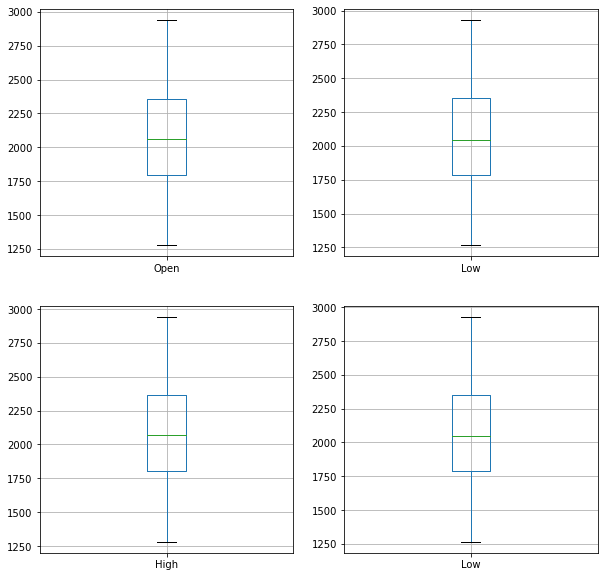

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(10,10))
dataset.boxplot(column='Open', ax=axes[0,0])
dataset.boxplot(column='Low',ax=axes[0,1])
dataset.boxplot(column='High', ax=axes[1,0])
dataset.boxplot(column='Low',ax=axes[1,1])
plt.show()

# EDA

In [28]:
data = dataset.iloc[:,[1,2,3,4,5]]

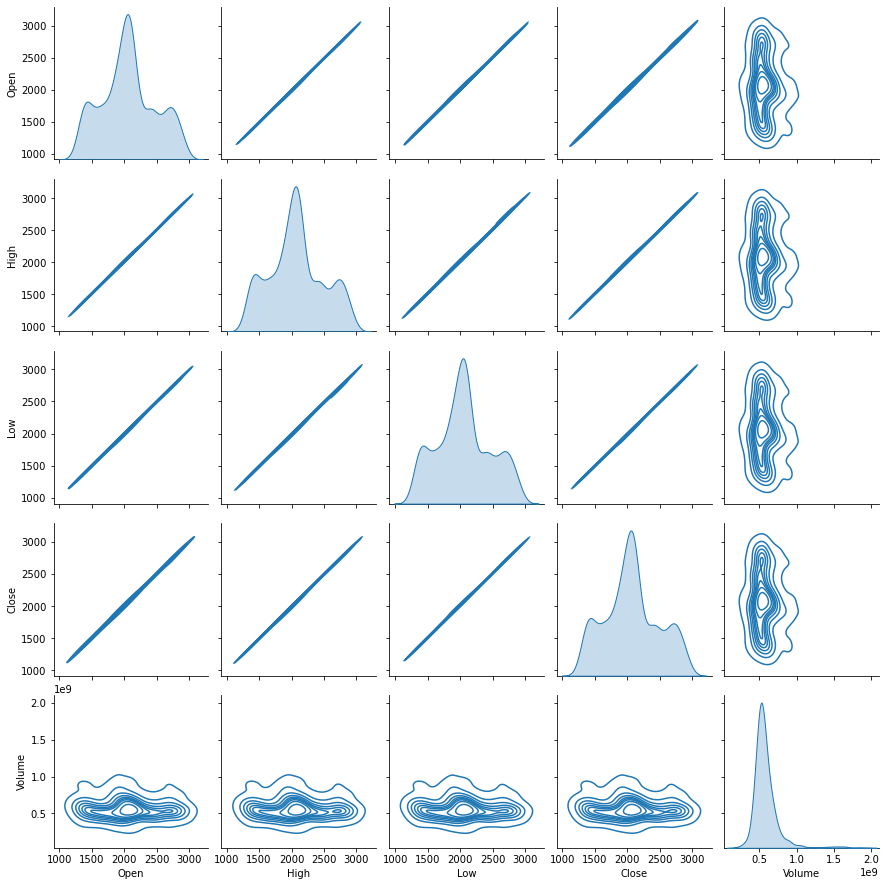

In [29]:
sns.pairplot(data,kind='kde')

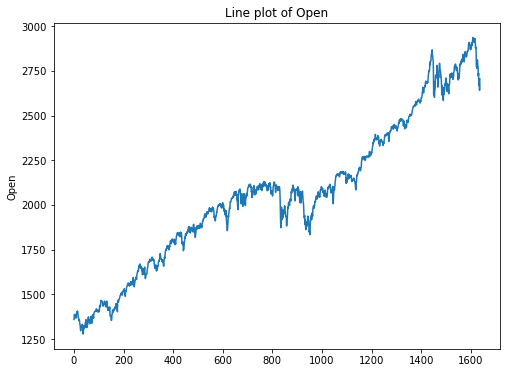

In [30]:
plt.figure(figsize = (8,6))
dataset['Open'].plot()
plt.ylabel('Open')
plt.title('Line plot of Open')
plt.show()

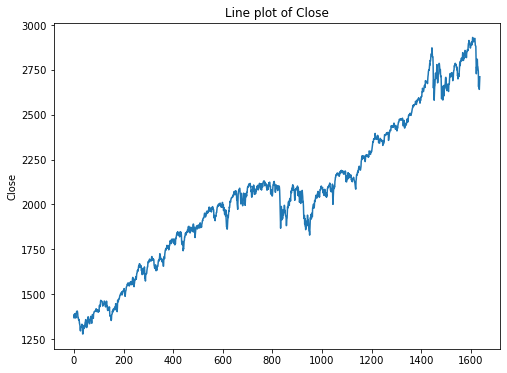

In [31]:
plt.figure(figsize = (8,6))
dataset['Close'].plot()
plt.ylabel('Close')
plt.title('Line plot of Close')
plt.show()

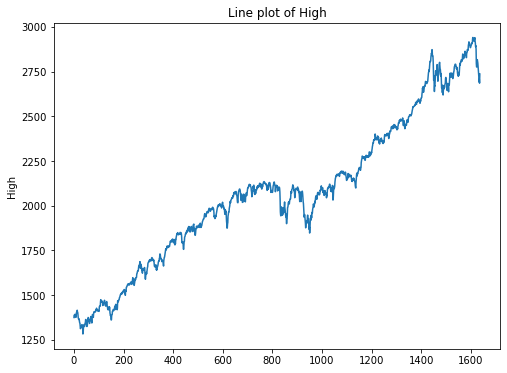

In [32]:
plt.figure(figsize = (8,6))
dataset['High'].plot()
plt.ylabel('High')
plt.title('Line plot of High')
plt.show()

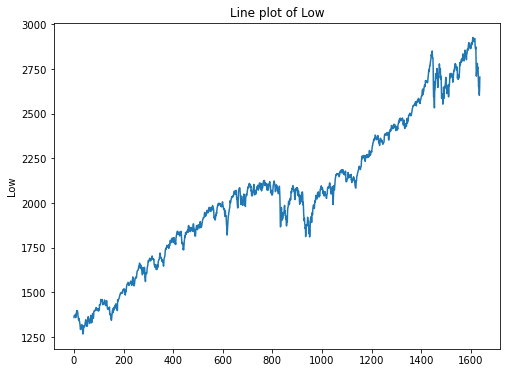

In [33]:
plt.figure(figsize = (8,6))
dataset['Low'].plot()
plt.ylabel('Low')
plt.title('Line plot of Low')
plt.show()

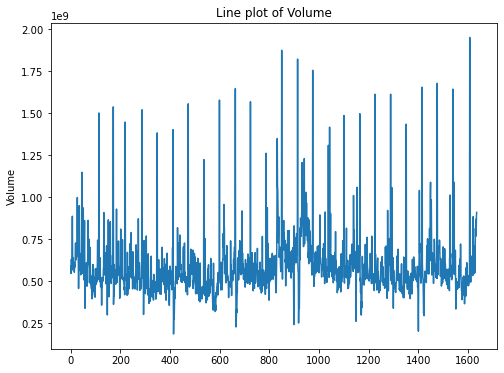

In [34]:
plt.figure(figsize = (8,6))
dataset['Volume'].plot()
plt.ylabel('Volume')
plt.title('Line plot of Volume')
plt.show()

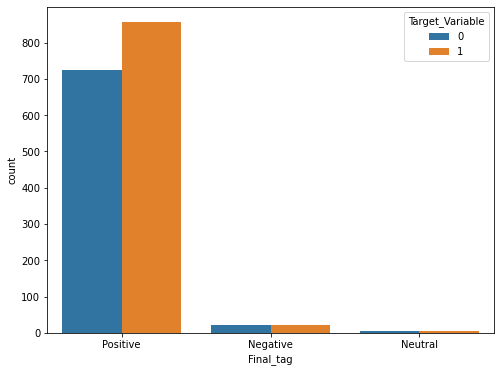

In [35]:
plt.figure(figsize = (8,6))
sns.countplot(data = dataset,x ='Final_tag',hue = 'Target_Variable' )
plt.show()

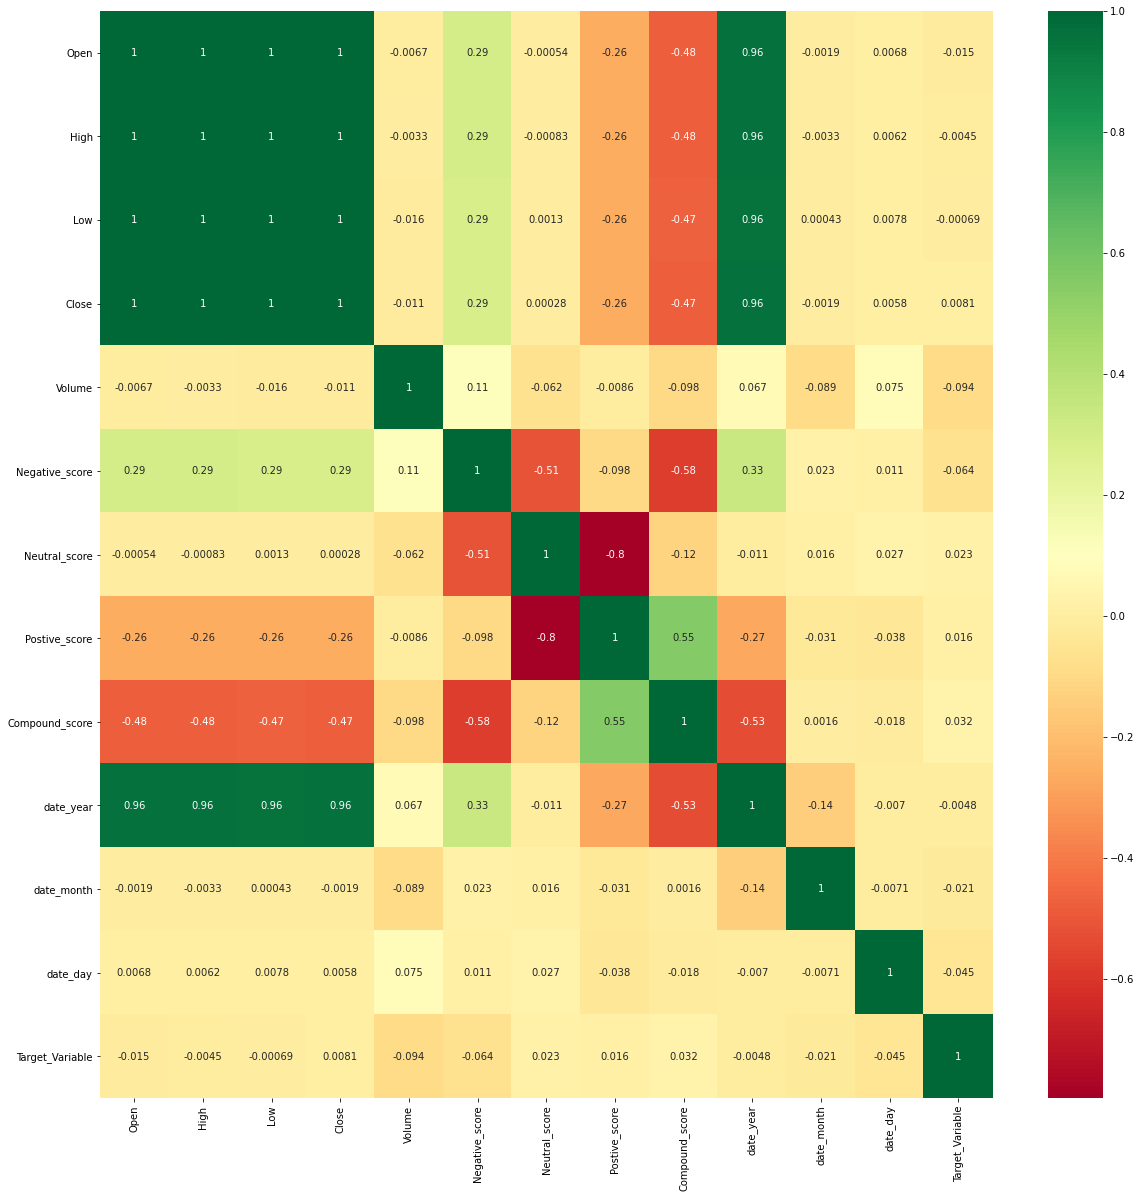

In [36]:
plt.figure(figsize = (20,20))
sns.heatmap(dataset.corr(), annot = True, cmap = "RdYlGn")
plt.show()

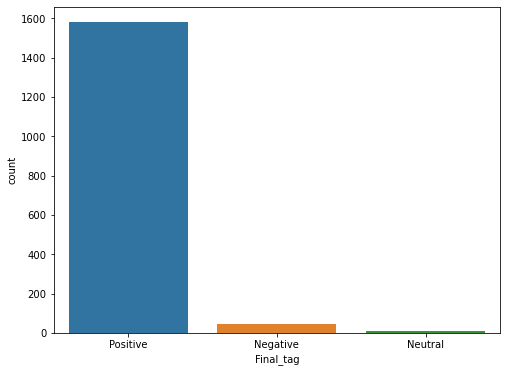

In [37]:
plt.figure(figsize = (8,6))
sns.countplot(data = dataset,x ='Final_tag')
plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


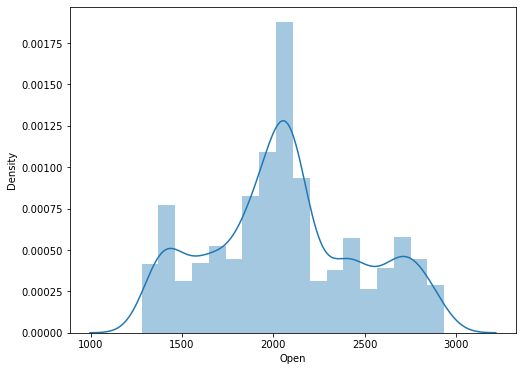

In [38]:
plt.figure(figsize = (8,6))
ax = sns.distplot(dataset.Open)
plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


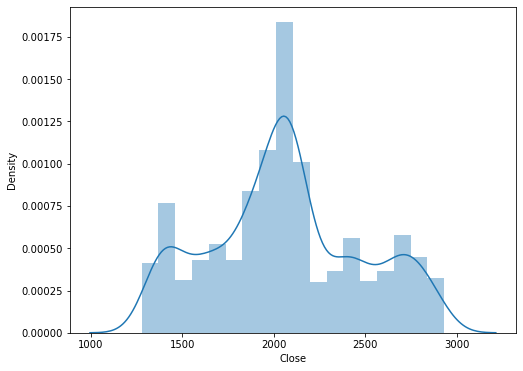

In [39]:
plt.figure(figsize = (8,6))
ax = sns.distplot(dataset.Close)
plt.show()

In [40]:
dataset = pd.get_dummies(dataset,drop_first= False)
dataset.head()

,Date,Open,High,Low,Close,Volume,Negative_score,Neutral_score,Postive_score,Compound_score,date_year,date_month,date_day,Target_Variable,Final_tag_Negative,Final_tag_Neutral,Final_tag_Positive
0,2012-04-11,1358.98,1374.71,1358.98,1368.70,593003200,0.030500,0.869786,0.099714,0.135264,2012,4,11,0,0,0,1
1,2012-04-12,1368.77,1388.13,1368.77,1387.56,547368832,0.000000,0.895000,0.105000,0.299767,2012,4,12,1,0,0,1
2,2012-04-13,1387.61,1387.61,1369.85,1370.26,631237824,0.125500,0.874500,0.000000,-0.345400,2012,4,13,0,1,0,0
3,2012-04-16,1370.27,1379.66,1365.38,1369.57,596952128,0.000000,0.833500,0.166500,0.719450,2012,4,16,0,0,0,1
4,2012-04-17,1369.57,1392.76,1369.57,1390.78,566529216,0.069412,0.766824,0.163706,0.172247,2012,4,17,1,0,0,1


In [41]:
dataset.to_csv('finaldataset.csv',index=False)